In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Height_Weight dataset

In [2]:
filepath = r"C:\Users\user\Documents\height_weight_dataset.csv"

df = pd.read_csv(filepath)

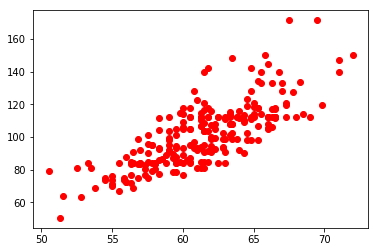

In [3]:
x = df['Height']

y = df['Weight']


kmeans = KMeans(n_clusters = 2)

kmeans_output = kmeans.fit([x,y])


pl.scatter(x,y,c='red')

centers = kmeans_output.cluster_centers_

#print(centers)



# Elbow method

In [4]:
x = ['Height','Weight']
y = df[x]
score = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = "k-means++",random_state = 10)
    kmeans.fit(y)
    score.append(kmeans.inertia_)

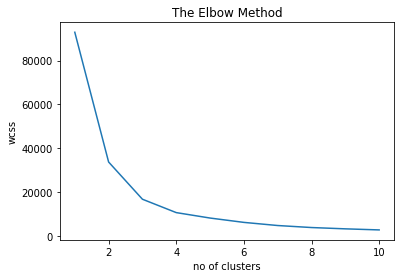

In [5]:
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

# 500-person-gender-height-weight-bodymassindex

In [6]:
df = pd.read_csv(r"C:\Users\user\Downloads\500-person-gender-height-weight-bodymassindex\500_Person_Gender_Height_Weight_index.csv")
df.head(4)                 

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3


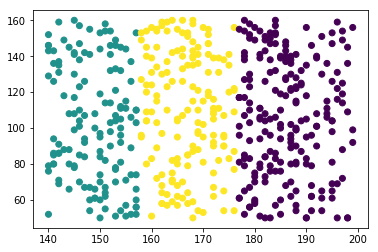

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.Height.values.reshape(-1,1),df.Weight.values.reshape(-1,1))
plt.scatter(x=df.Height.values,y=df.Weight.values,c=kmeans.labels_)

In [8]:
#x = df['Height']
#y = df['Weight']
#kmeans.fit([x,y])
#plt.scatter(x,y)

# Elbow method

In [9]:
x = ['Height','Weight','Index']
y = df[x]
score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(y)
    score.append(kmeans.inertia_)
# plotting the score


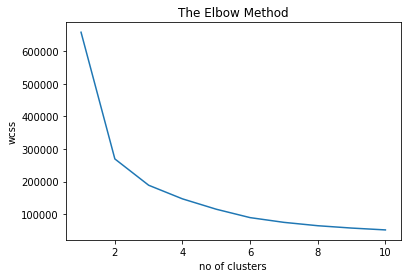

In [10]:
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()


In [11]:
print(score)

[657990.68, 269319.9796450689, 188593.58814254607, 146810.8617015604, 114998.30158159773, 89262.3573642108, 74751.99062502733, 64445.60136697928, 57238.326556676664, 51570.98641380867]


# KC house data

In [12]:
df = pd.read_csv(r"C:\Users\user\Downloads\housesalesprediction\kc_house_data.csv")

df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [14]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17449,2919200440,20150407T000000,715000.0,4,2.50,1860,3840,1.5,0,0,...,7,1170,690,1928,2014,98117,47.6886,-122.359,1400,3840
2418,2221000070,20150327T000000,280000.0,3,1.75,1590,7280,1.0,0,0,...,7,1140,450,1974,0,98058,47.4288,-122.153,1590,9634
6609,7971300020,20150331T000000,800000.0,5,2.00,2960,10960,1.0,0,0,...,7,1500,1460,1957,0,98005,47.6162,-122.174,2160,10960
7403,1545803340,20150224T000000,269000.0,3,1.75,1530,7930,1.0,0,0,...,7,1530,0,1986,0,98038,47.3609,-122.050,1610,7930
12950,120059044,20150217T000000,250000.0,3,1.75,1628,286355,1.0,0,0,...,7,1628,0,1996,0,98092,47.2558,-122.122,1490,216344


In [17]:
features = [ 'sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms','view', 'sqft_basement', 'bedrooms', 'lat']

x_train,x_test,y_train,y_test = train_test_split(df[features],df[['price']],test_size = 0.20,shuffle = True)

ln_reg = KMeans(n_clusters=2)

ln_reg.fit(x_train,y_train)

y_pred = ln_reg.predict(x_test)
print('predicted_value :',y_pred)


predicted_value : [1 1 0 ... 0 0 0]


In [18]:
features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'condition', 'long', 'id', 'zipcode']

x_train,x_test,y_train,y_test = train_test_split(df[features],df['price'],test_size = 0.20,shuffle = True)

ln_reg = KMeans(n_clusters=2)

ln_reg.fit(x_train,y_train)

y_pred = ln_reg.predict(x_test)

print('predicted:',y_pred)

#print(ln_reg.cluster_centers_)


predicted: [1 1 1 ... 0 0 0]
